# <h1>Scrapping Twitter</h1>



*   **Instal Library Snscrape**



In [21]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi : Untuk mengambil data pada jejaring sosial, seperti profil, tagar, atau pencarian pengguna dan mengembalikan item yang ditemukan.



*   **Instal Library Langdetect**



In [22]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi : untuk mendeteksi bahasa dan mengubahnya supaya bisa dipahami  oleh phyton. Menghasilkan data text dan mengembalikannya ke dalam list tuples sesuai dengan max_num 

In [23]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect



*   **Deklarasi syntax, kemudian masukan ke dalam "datatw"**


In [24]:
keywords=['Ijazah Palsu Jokowi']
start="2022–10–3"
end ="2022–10–25"
max_num=555
fname='tweet.json' 
languages=['id','en']

In [25]:
import pandas as pd
datatw=[]

In [26]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [27]:
datatw

['@democrazymedia Jokowi terkesan mau menegaskan bahwa ijazah palsu dia bener adanya',
 '@TriSartopo @optimus_krim Tantang mereka untuk menunjukkan bukti kalau ijazah Jokowi palsu pasti tak bisa.',
 '@DokterTifa Justru yg bikin malu dan mempermalukan diri sendiri ya Lo laah dokter stress udah nyebarin berita bohong soal ijazah palsu terus sekarang masih aja menghina presiden dan keluarga Jokowi soal skill bahasa Inggris gak perlu Lo itu pake bantalan seorang lurah',
 "Sudah Masuk Materi Pengadilan, Refly Harun Ingatkan Jokowi Tak Perlu Menghindar Soal Isu 'Ijazah Palsu': Satu-satunya Jalan Adalah… https://t.co/GB0aHZHDKu",
 '@OposisiCerdas Kocak2 cuitannya..wkwkwkwkwk\nTapi seandainya nich jokowi kasih liat ijazah dan di cek dipengadilan ternyata Asli. Gimana ya Reaksinya\nMasih kah bilang palsu..kwkwkwk..',
 '@sasonwilianto @nenggusti @SuwitoRobby Intinya jokowi dan org2x di belakang nya tetap akan berusaha mengginakan cara apapun , supaya , IJAZAH PALSU ini sulit utk diungkap..',
 'K



*   **Cetak datatw yang belum di lakukan proses klastering menjadi csv file**

In [28]:
import pandas as pd
SebelumKlaster = pd.DataFrame(datatw)
SebelumKlaster.to_csv('Data_Sebelum_diklastering.csv', index = False)



*   **Instal Library Sastrawi**


In [29]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fungsi : mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya



*   **melakukan proses stemming, penghilangan stopword (proses filtering), dan penghilangan karakter yang tidak bermakna**



In [30]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process

# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

documents_clean=[]

for d in datatw:
  
  # Start Case Folding

  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove URL
  document_test = re.sub(r'http\S+', '', document_test)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Lowercase the document
  document_test = document_test.lower()
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Remove the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  outputcase = re.sub(r'\s{2,}', ' ', document_test)
    
  # End Case Folding
    
  # Proses Stemming
  outputstem= stemmer.stem(outputcase)

  # Proses Filtering (StopwordRemover)
  outputstop = stopword.remove(outputstem)

  documents_clean.append(outputstop)

In [31]:
documents_clean[0:10]

['jokowi kes mau tegas ijazah palsu bener',
 'tantang untuk tunjuk bukti kalau ijazah jokowi palsu tak',
 'justru yg bikin malu malu diri sendiri lo laah dokter stress udah nyebarin berita bohong soal ijazah palsu terus sekarang aja hina presiden keluarga jokowi soal skill bahasa inggris gak perlu lo pake bantal orang lurah',
 'masuk materi adil refly harun ingat jokowi tak perlu hindar soal isu ijazah palsu satu satu jalan',
 'kocak cuit wkwkwkwkwk anda nich jokowi kasih liat ijazah di cek adil nyata asli gimana reaksi kah bilang palsu kwkwkwk',
 'inti jokowi orgx belakang nya tetap usaha mengginakan cara apa ijazah palsu sulit utk ungkap',
 'konstitusi tabrak yakin dgn supremasi hukum beneran palsu tak dpt beda jabat amp warga negara biasa refly harun jokowi jangan instrumen negara wakil gugat ijazah palsu urus pribadi',
 'benar kawan mereka tunjukin bukti mereka tuduh jokowi ijazah palsu bisa cocok yg saksi lembaga terbit bgt bro',
 'tenang aja tunggu sidang ijazah palsu jokowi tela

In [32]:
import pandas as pd
SesudahClean = pd.DataFrame(documents_clean)
SesudahClean.to_csv('Data_yang_dapat_terbaca_di_Python.csv', index = False)



*   **Melakukan proses tf-idf**



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

Fungsi : untuk mencari makna kalimat yang terdiri dari kata-kata dan menghilangkan ketidakmampuan teknik **Bag of Words** (metode sederhana, hanya menghitung frekuensi kemunculan kata pada seluruh dokumen.) yang baik untuk klasifikasi teks maupun untuk membantu mesin membaca kata dalam angka



*   **Menampilkan Diagram Batang**

Text(0.5, 1.0, 'Kata-Kata yang Sering Muncul - Top 20')

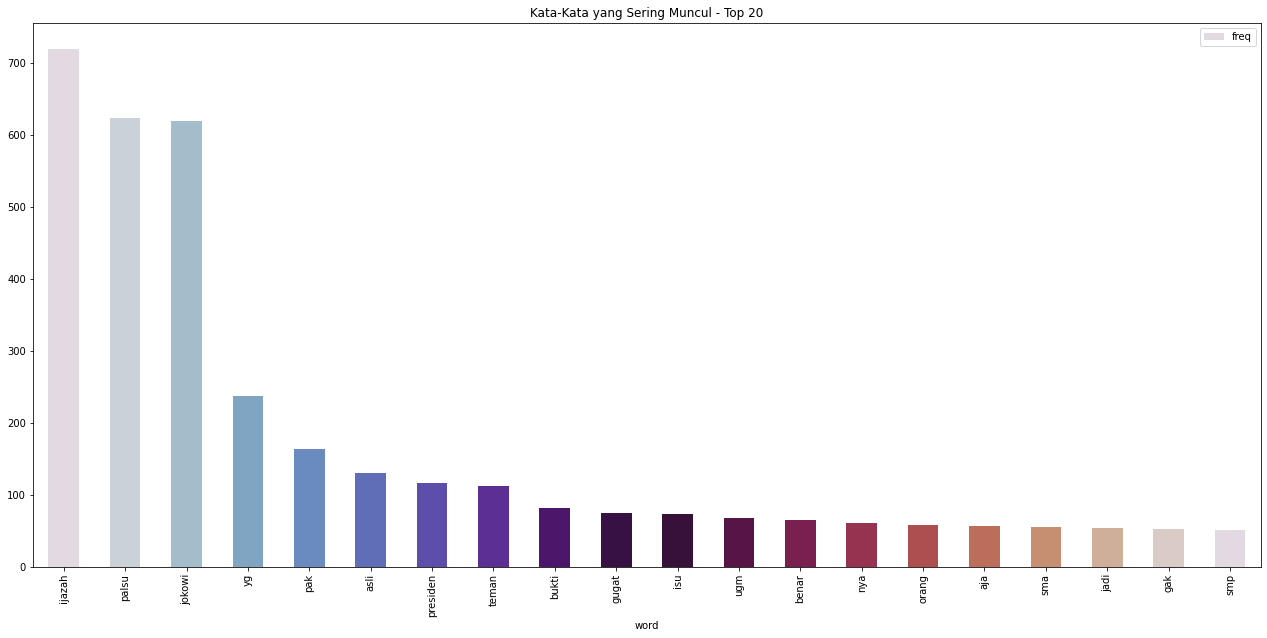

In [34]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(22, 10), color = color)
plt.title("Kata-Kata yang Sering Muncul - Top 20")



*   <h2><b>Proses Klastering</b></h2>




*   **Metode K-Means**

pada metode ini, dokumen akan dikelompokan setiap clusternya. Jadi konsepnya itu setiap label/kelompok data belum ditentukan di awal. Penentuan pengelompokan clusteringnya berdasarkan jarak terdekat terhadap Centroidnya (titik pusat). Menghitung centroid bisa menggunakan Rumus Euclidean Distance, kemudian setiap perubahan nilai centroid maka centroid yang akan bergerak ke titik pusat masing-masing datanya membentuk cluster-cluster baru.

In [35]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [36]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 yg
 ijazah
 jokowi
 palsu
 gugat
 bukti
 asli
 nya
 hrs
 kan
Cluster 1:
 ijazah
 jokowi
 teman
 palsu
 isu
 presiden
 kuliah
 sekolah
 koar
 pak
Cluster 2:
 ijazah
 palsu
 jokowi
 yg
 pak
 asli
 presiden
 bukti
 ugm
 nya




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




*   **Menampilkan Dendogram dengan Metode Single Linkage**

prosedur ini didasarkan pada jarak terkecil. Jika dua obyek terpisah oleh jarak yang pendek maka kedua obyek tersebut akan digabung menjadi satu cluster daan demikian saterusnya.

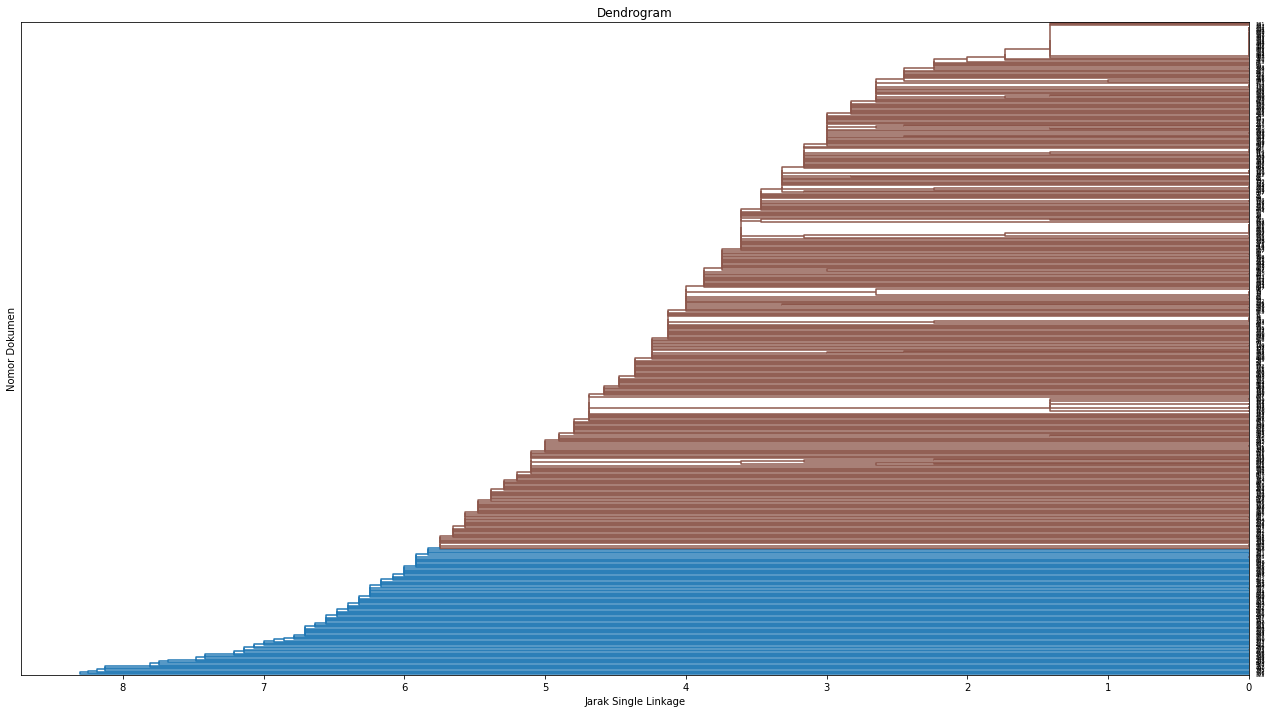

In [37]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(22,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single',metric='euclidean'),orientation="left")
plt.title('Dendrogram')
plt.xlabel('Jarak Single Linkage')
plt.ylabel('Nomor Dokumen')
plt.show()

*   **Menampilkan Dendogram dengan Metode Ward**

Metode Ward bertujuan untuk memperoleh cluster yang memiliki varians internal cluster yang sekecil mungkin. Metode ini menggunakan Error sums of squares (ESS) dalam kelompok sebagai ukuran homogenitas. Jadi jarak antara dua cluster dalam metode ini berdasarkan total sum of square dua cluster pada masing-masing variabel. 


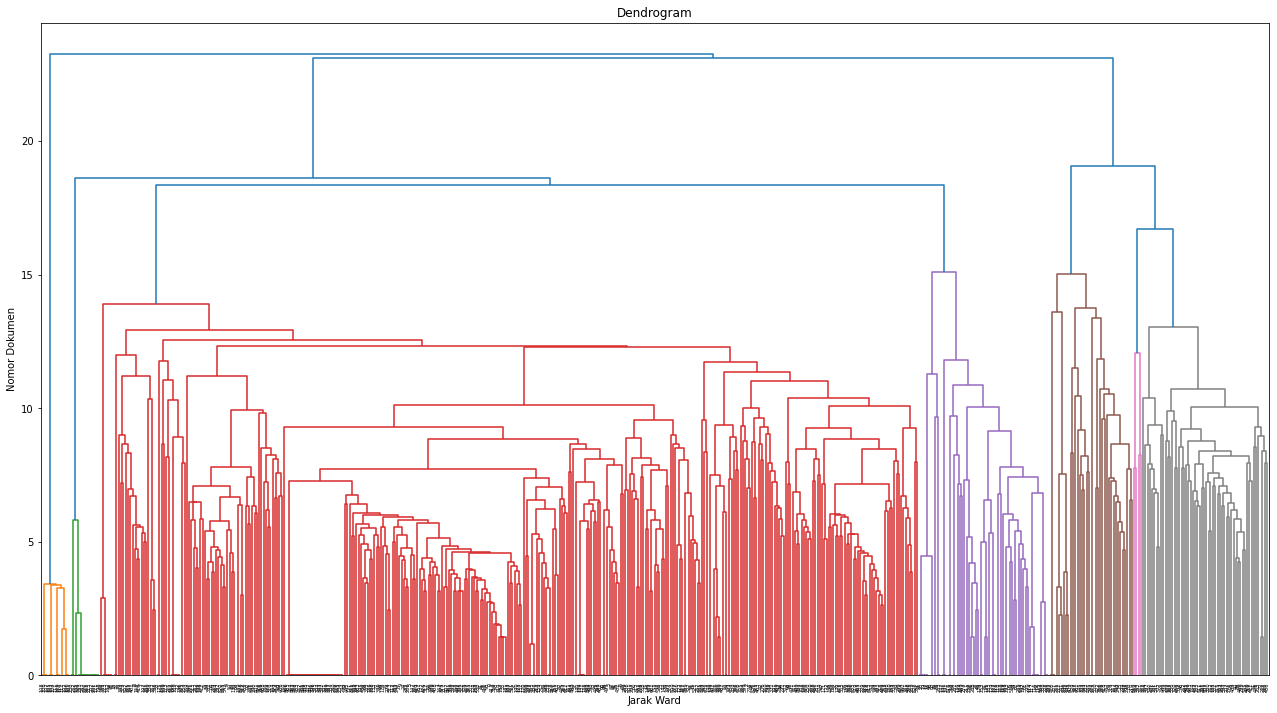

In [38]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(22,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()



*   **Menampilkan Dendogram dengan Metode Average**

prosedure ini hampir sama dengan Single Linkage, namun kriteria yang digunakan adalah rata-rata jarak seluruh individu dalam suatu cluster dengan jarak seluruh individu dalam cluster yang lain.

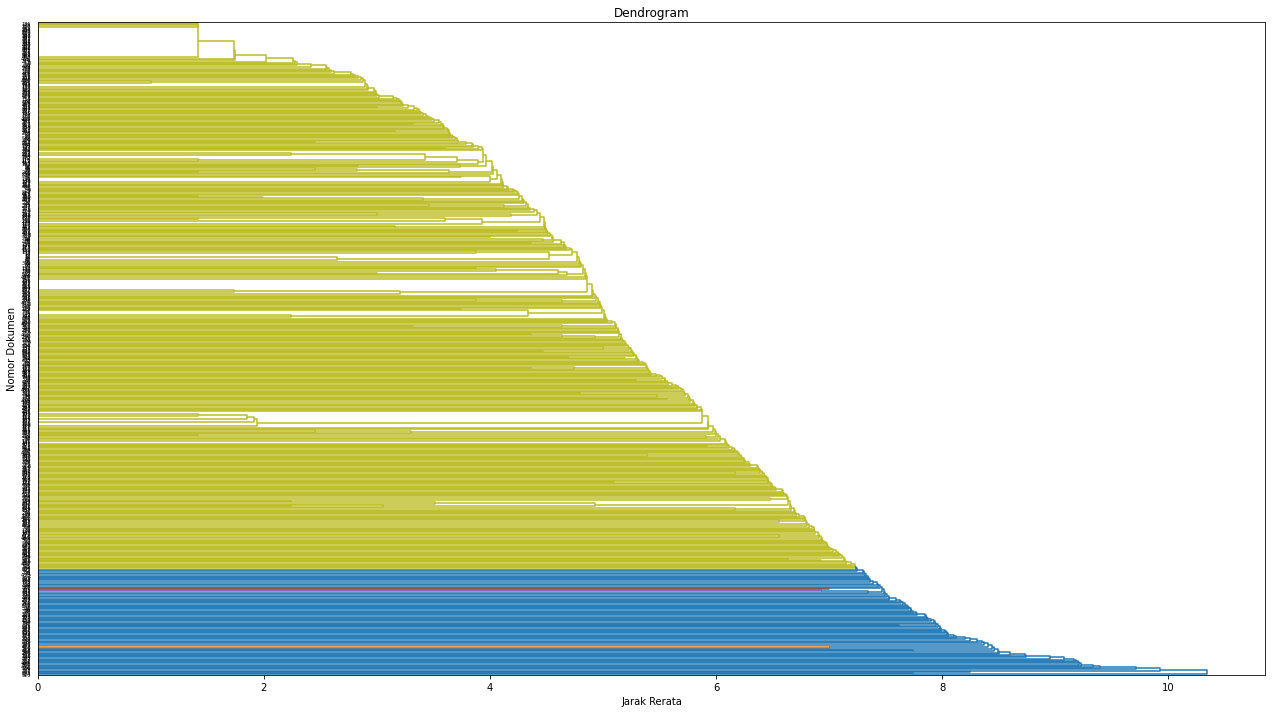

In [39]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
plt.figure(figsize=(22,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()